In [1]:
import pandas as pd 
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "png" # needed to make the plotly.express show on github
from internproject.constants import ROOT_DATA_DIR

In [2]:
rETH_wETH_apr_df = pd.read_csv(
    ROOT_DATA_DIR
    / 'daily_snapshots/0x5aEe1e99fE86960377DE9f88689616916D5DcaBe_apr_df.csv',
    index_col=0,
    parse_dates=True,
)

rETH_wETH_apr_df

,block,tokens,balances,lastChangeBlock,lp_token_virtual_price,lp_token_total_supply,protocol_swap_fee_percent,pool_balance_1,pool_balance_2,pool_balance_3,...,pool_balance_equilibrium_portion_1,pool_balance_equilibrium_portion_2,pool_balance_equilibrium_portion_3,lp_token_equilibrium_eth_value,lp_token_discount_percent,raw_base_apr,raw_fee_apr,raw_incentive_apr,raw_price_apr,pool_address
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-01-02,NaN,"['0x5aEe1e99fE86960377DE9f88689616916D5DcaBe',...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0x5aEe1e99fE86960377DE9f88689616916D5DcaBe
2022-01-03,NaN,"['0x5aEe1e99fE86960377DE9f88689616916D5DcaBe',...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0x5aEe1e99fE86960377DE9f88689616916D5DcaBe
2022-01-04,NaN,"['0x5aEe1e99fE86960377DE9f88689616916D5DcaBe',...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0x5aEe1e99fE86960377DE9f88689616916D5DcaBe
2022-01-05,NaN,"['0x5aEe1e99fE86960377DE9f88689616916D5DcaBe',...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0x5aEe1e99fE86960377DE9f88689616916D5DcaBe
2022-01-06,NaN,"['0x5aEe1e99fE86960377DE9f88689616916D5DcaBe',...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0x5aEe1e99fE86960377DE9f88689616916D5DcaBe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-27,17346692.0,"['0x5aEe1e99fE86960377DE9f88689616916D5DcaBe',...",['2596148429266111716327941219634622' '5856734...,17344930.0,1.009428,18758.185328,0.5,5856.734701,6274.500191,5414.849364,...,0.348236,0.345204,0.306560,1.009448,-0.031950,2.456310,0.000000,4.697637,0.031950,0x5aEe1e99fE86960377DE9f88689616916D5DcaBe
2023-05-28,17353818.0,"['0x5aEe1e99fE86960377DE9f88689616916D5DcaBe',...",['2596148429266144199802052625938702' '6073248...,17353036.0,1.009495,18951.719355,0.5,6073.248198,6274.604862,5368.563238,...,0.357449,0.341709,0.300843,1.009513,0.043756,2.229397,0.201188,4.705578,-0.043756,0x5aEe1e99fE86960377DE9f88689616916D5DcaBe
2023-05-29,17360948.0,"['0x5aEe1e99fE86960377DE9f88689616916D5DcaBe',...",['2596148429266143326021373461863756' '6073967...,17360468.0,1.009552,18983.395244,0.5,6073.967999,6274.770089,5396.465063,...,0.356909,0.341167,0.301924,1.009590,0.069395,2.295601,0.000000,4.645651,-0.069395,0x5aEe1e99fE86960377DE9f88689616916D5DcaBe


In [3]:
rETH_wETH_apr_df.columns

Index(['block', 'tokens', 'balances', 'lastChangeBlock',
       'lp_token_virtual_price', 'lp_token_total_supply',
       'protocol_swap_fee_percent', 'pool_balance_1', 'pool_balance_2',
       'pool_balance_3', 'pool_balance_market_1', 'pool_balance_market_2',
       'pool_balance_market_3', 'market_eth_tvl',
       'pool_balance_market_portion_1', 'pool_balance_market_portion_2',
       'pool_balance_market_portion_3', 'lp_token_market_eth_value',
       'pool_balance_equilibrium_1', 'pool_balance_equilibrium_2',
       'pool_balance_equilibrium_3', 'equilibrium_eth_tvl',
       'pool_balance_equilibrium_portion_1',
       'pool_balance_equilibrium_portion_2',
       'pool_balance_equilibrium_portion_3', 'lp_token_equilibrium_eth_value',
       'lp_token_discount_percent', 'raw_base_apr', 'raw_fee_apr',
       'raw_incentive_apr', 'raw_price_apr', 'pool_address'],
      dtype='object')

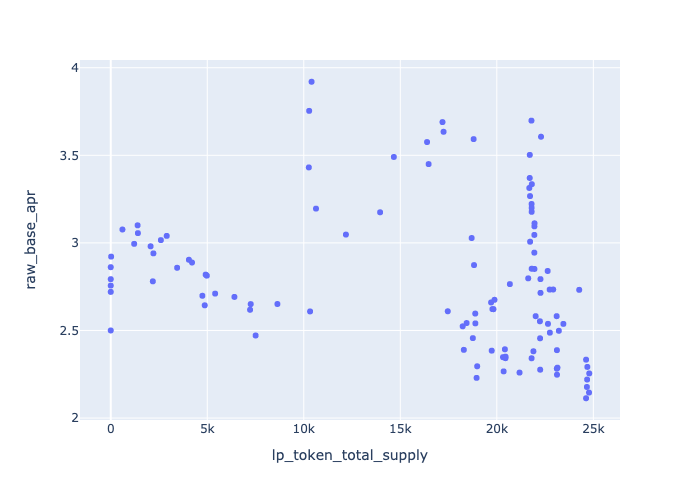

In [4]:
px.scatter(rETH_wETH_apr_df, x='lp_token_total_supply', y='raw_base_apr')

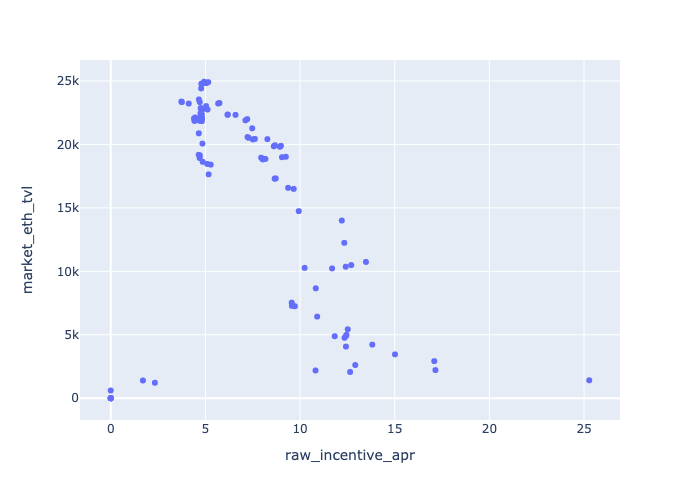

In [5]:
px.scatter(rETH_wETH_apr_df, x='raw_incentive_apr', y='market_eth_tvl')

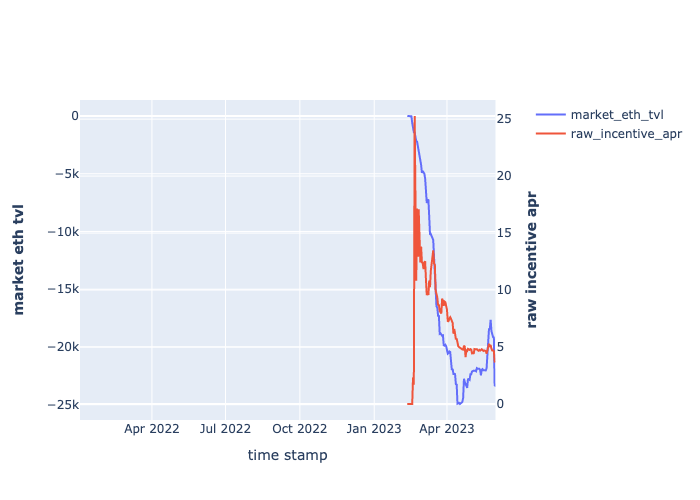

In [6]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=rETH_wETH_apr_df.index, y=-rETH_wETH_apr_df['market_eth_tvl'], name='market_eth_tvl'), 
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=rETH_wETH_apr_df.index, y=rETH_wETH_apr_df['raw_incentive_apr'], name='raw_incentive_apr'), 
    secondary_y=True,
)

# Set x-axis title
fig.update_xaxes(title_text="time stamp")

# Set y-axes titles
fig.update_yaxes(title_text="<b>market eth tvl</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>raw incentive apr</b>", secondary_y=True)

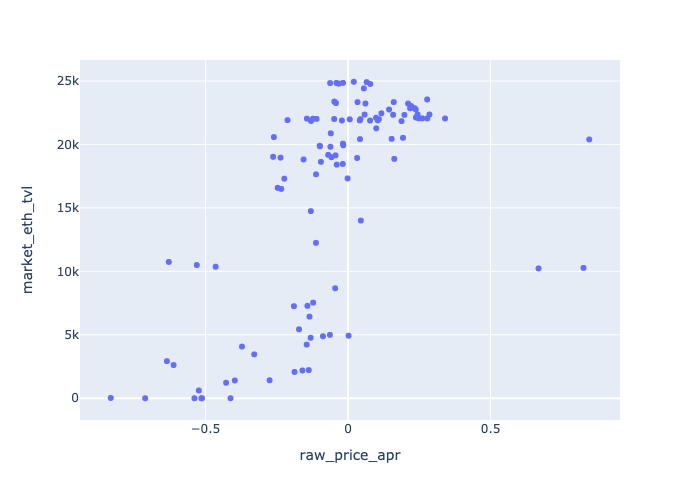

In [7]:
px.scatter(rETH_wETH_apr_df, x='raw_price_apr', y='market_eth_tvl')

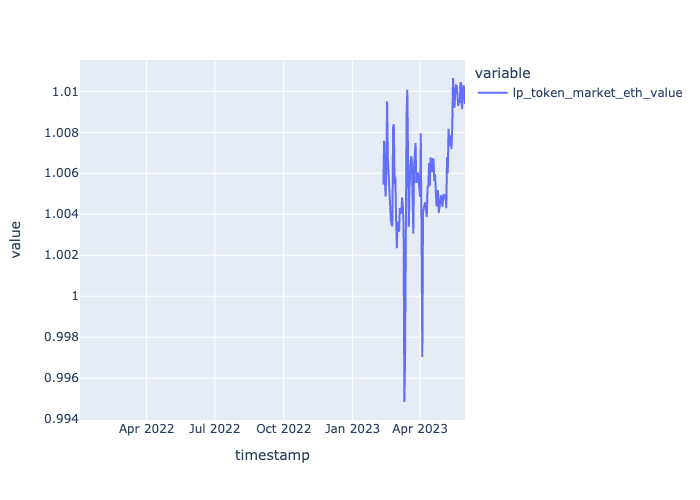

In [8]:
px.line(rETH_wETH_apr_df['lp_token_market_eth_value'])